<a href="https://colab.research.google.com/github/sakshi-suryawanshi1/projects/blob/main/SER_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
pip install librosa --quiet

In [ ]:
import glob
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
import os

In [ ]:
import opendatasets as od
download_url = 'https://www.kaggle.com/uwrfkaggler/ravdess-emotional-speech-audio'
od.download(download_url,force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sakshisuryawanshi
Your Kaggle Key: ··········


100%|██████████| 429M/429M [00:02<00:00, 159MB/s]


In [ ]:
data_filename = '/content/ravdess-emotional-speech-audio'

In [ ]:
# all emotions on RAVDESS dataset
int2emotion = {
  "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}


# we allow these emotions
AVAILABLE_EMOTIONS = {
    "fearful",
    "sad",
    "neutral",
    "happy"
}

target_emotions = {
    "happy" : 0,
    "sad" : 1,
    "neutral" : 2,
    "fearful" : 3
}

In [ ]:
def extract_feature(file_name):
  X,sample_rate = librosa.load(file_name, dtype="float64", mono="true",sr=48000)
  result = np.array([])

  mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc = 40).T, axis=0)
  result = np.hstack((result, mfccs))

  stft = np.abs(librosa.stft(X))     #absolute value # Short-time Fourier transform (STFT), is a Fourier-related transform used to determine the sinusoidal frequency and phase content of local sections of a signal as it changes over time
  chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate, n_chroma= 12).T,axis=0)
  result = np.hstack((result, chroma))

  return result

In [ ]:
def load_ravdess(test_size=0.2):
    X, y = [], []
    try :

      for file in glob.glob("/content/ravdess-emotional-speech-audio/Actor_*/*.wav"):

          # get the base name of the audio file
          basename = os.path.basename(file)


          emotion_str = int2emotion[basename.split("-")[2]]
          if emotion_str in target_emotions:
            emotion = target_emotions[emotion_str]
          else:
              continue

          features = extract_feature(file)
          X.append(features)
          y.append(emotion)
    except :
        print(basename)
        pass
    # split the data to training and testing and return it
    return X, y

In [ ]:
 X1, y1= load_ravdess()

In [ ]:
print(y1, len(y1))

[1, 2, 3, 0, 0, 0, 1, 0, 0, 2, 3, 3, 3, 2, 0, 1, 2, 3, 3, 0, 1, 3, 1, 1, 1, 1, 0, 3, 0, 1, 2, 0, 3, 3, 0, 1, 1, 3, 3, 3, 1, 0, 0, 3, 0, 3, 1, 3, 2, 2, 1, 0, 0, 1, 1, 2, 1, 3, 1, 3, 3, 0, 0, 2, 3, 2, 2, 1, 1, 0, 1, 3, 3, 2, 3, 1, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0, 3, 1, 3, 3, 3, 0, 1, 0, 0, 3, 1, 1, 1, 3, 2, 1, 0, 2, 1, 3, 0, 2, 1, 2, 3, 0, 3, 2, 0, 3, 0, 3, 3, 3, 0, 3, 1, 2, 1, 0, 0, 0, 1, 3, 0, 1, 0, 2, 1, 1, 3, 1, 1, 2, 0, 1, 3, 1, 1, 0, 2, 1, 0, 2, 2, 3, 1, 3, 1, 0, 0, 1, 1, 3, 3, 0, 3, 0, 2, 0, 3, 3, 3, 0, 1, 1, 1, 2, 2, 3, 0, 0, 0, 1, 1, 1, 3, 2, 3, 3, 0, 1, 0, 3, 3, 2, 3, 0, 1, 0, 0, 2, 0, 3, 0, 3, 1, 1, 3, 3, 1, 2, 3, 2, 0, 3, 3, 2, 0, 1, 1, 3, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0, 3, 3, 3, 3, 0, 0, 0, 1, 3, 2, 3, 3, 3, 0, 1, 0, 3, 1, 0, 0, 3, 1, 1, 1, 3, 1, 3, 0, 2, 3, 1, 0, 2, 3, 2, 3, 2, 1, 3, 0, 0, 0, 3, 1, 3, 3, 3, 1, 0, 0, 2, 1, 3, 1, 3, 0, 0, 2, 0, 1, 2, 1, 1, 2, 0, 3, 0, 0, 3, 1, 0, 2, 3, 0, 0, 3, 0, 0, 0, 3, 3, 1, 3, 0, 1, 1, 1, 3, 1, 1, 2, 1, 3, 3, 1, 

In [ ]:
print(X1[0])

[-5.22062669e+02  5.28681481e+01 -2.44114669e+01 -2.95765881e+00
 -7.61023091e+00 -3.73679445e+00 -1.64968227e+01 -9.29704096e+00
 -1.20435666e+01 -1.51761296e+01 -1.34212714e+01 -6.26838315e+00
 -8.03357756e-01 -9.11200923e+00 -8.53271093e+00  3.17715680e+00
 -2.71507519e-02 -1.71229266e+00  2.54704943e+00  1.18630531e+00
  3.25901557e+00  2.93687473e+00  3.28916701e+00  4.40895112e+00
  3.06122094e+00  6.38891259e+00  5.42340743e-01 -3.36761790e+00
 -5.77903510e-01  2.82024774e-01 -1.30626888e+00 -9.78701381e-01
 -1.03275114e+00 -1.67214845e+00 -6.61603161e-01 -8.39094023e-01
  1.28593594e+00 -1.11540952e+00 -3.37812100e+00 -1.82093127e+00
  5.60811507e-01  5.41442925e-01  5.46441624e-01  5.68269108e-01
  6.34353799e-01  6.61576797e-01  6.98527257e-01  6.47479069e-01
  5.99201774e-01  6.25581520e-01  6.36260223e-01  6.18607136e-01]


In [ ]:
import opendatasets as od
download_url = 'https://www.kaggle.com/datasets/barelydedicated/savee-database'
od.download(download_url,force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sakshisuryawanshi
Your Kaggle Key: ··········


100%|██████████| 215M/215M [00:01<00:00, 126MB/s]


In [ ]:
# a', 'd', 'f', 'h', 'n', 'sa' and 'su' represent 'anger', 'disgust', 'fear', 'happiness', 'neutral',
# 'sadness' and 'surprise' emotion classes respectively.

# all emotions on RAVDESS dataset
char2emotion = {
  "n": "neutral",
    # "02": "calm",
    "h": "happy",
    "sa": "sad",
    "a": "angry",
    "f": "fearful",
    "d": "disgust",
    "su": "surprised"
}


In [ ]:
def load_savee(test_size=0.3):
    X, y = [], []
    try :

      for file in glob.glob("/content/savee-database/AudioData/*/*.wav"):
          # get the base name of the audio file

          basename = os.path.basename(file)

          emotion_str = char2emotion[basename[:-6]]

          if emotion_str in target_emotions:
            emotion = target_emotions[emotion_str]
          else:
              continue

          features = extract_feature(file)
          X.append(features)
          y.append(emotion)
    except :
        print(basename)
        pass
    # split the data to training and testing and return it
    return X, y


In [ ]:
X2, y2 = load_savee()

In [ ]:
print(y2, len(y2), X2[0])

[2, 1, 1, 2, 0, 0, 0, 0, 1, 3, 1, 2, 1, 2, 0, 0, 3, 2, 2, 2, 2, 0, 2, 3, 2, 3, 3, 2, 2, 3, 0, 2, 2, 2, 2, 1, 3, 1, 3, 0, 2, 0, 1, 1, 1, 3, 3, 1, 2, 1, 0, 3, 1, 1, 3, 2, 2, 3, 2, 3, 0, 0, 2, 3, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 1, 3, 1, 2, 1, 2, 0, 0, 3, 2, 2, 2, 2, 0, 2, 3, 2, 3, 3, 2, 2, 3, 0, 2, 2, 2, 2, 1, 3, 1, 3, 0, 2, 0, 1, 1, 1, 3, 3, 1, 2, 1, 0, 3, 1, 1, 3, 2, 2, 3, 2, 3, 0, 0, 2, 3, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 1, 3, 1, 2, 1, 2, 0, 0, 3, 2, 2, 2, 2, 0, 2, 3, 2, 3, 3, 2, 2, 3, 0, 2, 2, 2, 2, 1, 3, 1, 3, 0, 2, 0, 1, 1, 1, 3, 3, 1, 2, 1, 0, 3, 1, 1, 3, 2, 2, 3, 2, 3, 0, 0, 2, 3, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 1, 3, 1, 2, 1, 2, 0, 0, 3, 2, 2, 2, 2, 0, 2, 3, 2, 3, 3, 2, 2, 3, 0, 2, 2, 2, 2, 1, 3, 1, 3, 0, 2, 0, 1, 1, 1, 3, 3, 1, 2, 1, 0, 3, 1, 1, 3, 2, 2, 3, 2, 3, 0, 0, 2, 3, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0] 300 [-6.45565944e+02  1.51496081e+02  4.13861853e+01  2.82926345e+01
  3.25987517e+01  1.46398134e+

In [ ]:
import opendatasets as od
download_url = 'https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess'
od.download(download_url,force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sakshisuryawanshi
Your Kaggle Key: ··········


100%|██████████| 428M/428M [00:03<00:00, 144MB/s]


In [ ]:

str2emotion = {
  "neutral": "neutral",
    "happy": "happy",
    "sad": "sad",
    "angry": "angry",
    "fear": "fearful",
    "disgust": "disgust",
    "ps": "surprised"
}


In [ ]:
def load_tess():
    X, y = [], []
    try :

      for file in glob.glob("/content/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/*/*.wav"):
          # get the base name of the audio file

          basename = os.path.basename(file)
          emo = basename.split('_')[-1][:-4]
          emotion_str = str2emotion[emo]
          if emotion_str in target_emotions:
            emotion = target_emotions[emotion_str]
          else:
              continue

          features = extract_feature(file)
          X.append(features)
          y.append(emotion)
    except :
        print(basename)
        pass
    # split the data to training and testing and return it
    return X, y


In [ ]:
X3, y3 = load_tess()

In [ ]:
print(X3[0],y3,len(y3),sep="\n" )

In [ ]:
import opendatasets as od
download_url = 'https://www.kaggle.com/datasets/piyushagni5/berlin-database-of-emotional-speech-emodb'
od.download(download_url,force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sakshisuryawanshi
Your Kaggle Key: ··········


100%|██████████| 38.0M/38.0M [00:00<00:00, 135MB/s]


In [ ]:
# Every utterance is named according to the same scheme:

# Positions 1-2: number of speaker
# Positions 3-5: code for text
# Position 6: emotion (sorry, letter stands for german emotion word)
# Position 7: if there are more than two versions these are numbered a, b, c ....
# Example: 03a01Fa.wav is the audio file from Speaker 03 speaking text a01 with the emotion "Freude" (Happiness).

# all emotions on RAVDESS dataset
code2emotion = {
  "N": "neutral",
    "L": "boredom",
    "F": "happy",
    "T": "sad",
    "W": "angry",
    "A": "fearful",
    "E": "disgust"
}

# A	anger	W	Ärger (Wut)
# B	boredom	L	Langeweile
# D	disgust	E	Ekel
# F	anxiety/fear	A	Angst
# H	happiness	F	Freude
# S	sadness	T	Trauer
# N = neutral version

In [ ]:
def load_emodb():
    X, y = [], []
    try :

      for file in glob.glob("/content/berlin-database-of-emotional-speech-emodb/wav/*.wav"):
          # get the base name of the audio file

          basename = os.path.basename(file)
          emotion_str = code2emotion[basename[5]]
          if emotion_str in target_emotions:
            emotion = target_emotions[emotion_str]
          else:
              continue

          features = extract_feature(file)
          X.append(features)
          y.append(emotion)
    except :
        print(basename)
        pass
    # split the data to training and testing and return it
    return X, y

In [ ]:
X4, y4 = load_emodb()

In [ ]:
print(X4[0], y4, len(y4), sep ="\n")

[-313.98026713  131.62898887   -6.49233423   35.79220565   26.55555858
   -1.42109824   17.43557536   -2.30446873   -7.19267612    6.20339834
  -12.08049884   -8.09743752    3.25644572   -4.71551617   -0.79611222
   -2.17316946   -1.74252124    8.05688819   -3.64899897   -8.83791547
    1.73993191   -2.68419918   -5.18674988   -1.99891162   -3.28575385
    0.61885777    0.50617138   -2.44694972   -0.49369838   -1.97433777
   -0.85092258    0.74495809   -1.71966738    3.00022652    5.64844756
    3.09632462    6.58149015    6.60652228    3.47489704    4.77720078
    0.56425539    0.60057695    0.59886295    0.61909819    0.60911499
    0.56802282    0.55325966    0.55694197    0.6184052     0.66395794
    0.68809856    0.60928862]
[2, 1, 3, 2, 2, 0, 3, 2, 3, 2, 0, 2, 1, 3, 3, 0, 1, 3, 0, 3, 1, 1, 0, 1, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 0, 1, 3, 3, 3, 3, 2, 2, 2, 2, 0, 3, 1, 2, 2, 0, 3, 2, 1, 2, 2, 0, 1, 3, 2, 3, 1, 1, 3, 0, 2, 1, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 3, 3, 0, 0, 0, 2, 2, 1, 3, 2, 1

In [ ]:
X = []
X.extend(X2)
X.extend(X3)
X.extend(X4)
print(len(X))

2181


In [ ]:
y = []
y.extend(y2)
y.extend(y3)
y.extend(y4)
print(len(y))

2181


In [ ]:
print(type(X),type(y))

<class 'list'> <class 'list'>


In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
print(type(X),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
X.shape, y.shape

((2181, 52), (2181,))

In [ ]:
 X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape,
     X_test.shape,
      y_train.shape,
      y_test.shape )

(1744, 52) (437, 52) (1744,) (437,)


In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [ ]:
x_traincnn.shape, x_testcnn.shape

((1744, 52, 1), (437, 52, 1))

In [ ]:
pip install keras

In [ ]:
pip install tensorflow

     |████████████████████████████████| 462 kB 5.0 MB/s 


In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

In [ ]:
from tensorflow import keras
from keras import optimizers

In [ ]:
model = Sequential()

model.add(Conv1D(64, 4,padding='same',
                 input_shape=(52,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 4,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(256, 4,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(learning_rate=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 52, 64)            320       
                                                                 
 activation (Activation)     (None, 52, 64)            0         
                                                                 
 dropout (Dropout)           (None, 52, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 13, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 13, 128)           32896     
                                                                 
 activation_1 (Activation)   (None, 13, 128)           0         
                                                        

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=200, validation_data=(x_testcnn, y_test))

Epoch 1/200
109/109 [==============================] - 5s 31ms/step - loss: 2.9113 - accuracy: 0.2970 - val_loss: 1.3998 - val_accuracy: 0.2563
Epoch 2/200
109/109 [==============================] - 3s 30ms/step - loss: 1.7088 - accuracy: 0.4295 - val_loss: 0.7808 - val_accuracy: 0.7735
Epoch 3/200
109/109 [==============================] - 3s 25ms/step - loss: 1.2275 - accuracy: 0.5493 - val_loss: 0.7218 - val_accuracy: 0.7941
Epoch 4/200
109/109 [==============================] - 3s 31ms/step - loss: 0.9439 - accuracy: 0.6456 - val_loss: 0.6837 - val_accuracy: 0.7231
Epoch 5/200
109/109 [==============================] - 2s 18ms/step - loss: 0.7288 - accuracy: 0.7282 - val_loss: 0.5356 - val_accuracy: 0.8101
Epoch 6/200
109/109 [==============================] - 2s 15ms/step - loss: 0.6090 - accuracy: 0.7781 - val_loss: 0.5297 - val_accuracy: 0.8215
Epoch 7/200
109/109 [==============================] - 2s 16ms/step - loss: 0.5755 - accuracy: 0.7947 - val_loss: 0.4442 - val_accuracy:

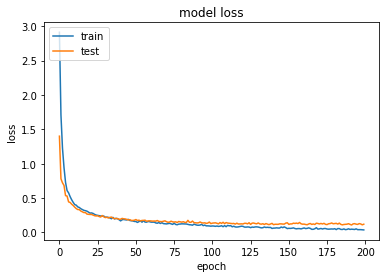

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

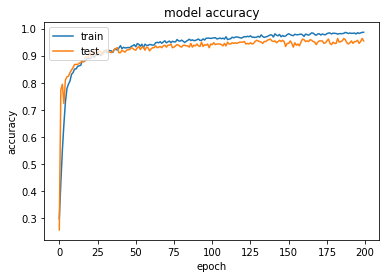

In [ ]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# predictions = model.predict_classes(x_testcnn)
# predictions = (model.predict(X_test) > 0.5).astype("int32")
predict_x=model.predict(X_test)
predictions=np.argmax(predict_x,axis=1)


In [ ]:
predictions

array([3, 1, 0, 2, 3, 1, 1, 3, 0, 2, 2, 1, 3, 1, 3, 2, 3, 3, 0, 1, 2, 1,
       1, 0, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 3, 3, 1, 2, 2, 2, 2, 1, 2, 1,
       3, 0, 1, 2, 2, 2, 1, 3, 2, 2, 0, 3, 2, 2, 3, 3, 1, 3, 1, 1, 1, 0,
       2, 1, 2, 3, 0, 0, 3, 2, 3, 2, 3, 2, 1, 3, 3, 3, 2, 0, 1, 0, 1, 2,
       3, 1, 2, 0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 1, 2, 0, 3, 1, 1, 3, 1, 1,
       3, 0, 1, 3, 2, 1, 3, 0, 0, 0, 2, 2, 1, 0, 1, 2, 2, 1, 3, 0, 2, 1,
       0, 2, 3, 1, 0, 0, 3, 3, 1, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 3, 0, 1,
       0, 0, 1, 3, 0, 2, 1, 3, 3, 2, 0, 1, 0, 3, 3, 2, 0, 2, 3, 0, 2, 3,
       2, 2, 1, 3, 2, 0, 1, 0, 0, 0, 1, 3, 0, 1, 0, 0, 3, 3, 2, 1, 3, 2,
       3, 3, 1, 3, 1, 2, 2, 3, 3, 0, 2, 2, 0, 0, 2, 1, 2, 2, 0, 1, 0, 2,
       1, 0, 2, 3, 0, 2, 1, 3, 0, 3, 0, 1, 1, 2, 0, 0, 2, 0, 3, 3, 2, 3,
       3, 3, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 3, 0, 0, 2, 2, 1, 1, 2, 0, 0,
       2, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 3, 0, 0, 2, 0, 2, 0, 1, 2, 2, 2,
       2, 2, 0, 1, 1, 3, 3, 2, 0, 0, 0, 2, 2, 2, 2,

In [ ]:
y_test

array([3, 1, 0, 2, 3, 1, 1, 3, 0, 2, 2, 0, 3, 1, 3, 2, 3, 3, 0, 1, 2, 1,
       1, 3, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 3, 3, 1, 2, 2, 2, 2, 1, 2, 1,
       3, 0, 1, 2, 2, 2, 1, 3, 2, 2, 0, 3, 2, 2, 3, 3, 1, 3, 1, 1, 1, 0,
       2, 1, 2, 3, 0, 0, 3, 2, 3, 2, 3, 2, 1, 3, 3, 3, 2, 0, 2, 0, 1, 1,
       3, 1, 2, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 1, 2, 0, 3, 1, 1, 3, 1, 1,
       3, 0, 1, 3, 2, 1, 3, 0, 0, 0, 2, 2, 1, 0, 1, 2, 2, 1, 3, 0, 2, 1,
       0, 2, 3, 0, 0, 0, 3, 3, 1, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 3, 3, 1,
       0, 0, 1, 0, 0, 2, 1, 3, 3, 2, 0, 1, 0, 3, 3, 2, 0, 2, 3, 0, 2, 3,
       2, 2, 1, 3, 2, 0, 1, 0, 0, 0, 1, 3, 0, 1, 0, 0, 3, 3, 2, 1, 3, 2,
       3, 3, 1, 3, 1, 2, 2, 3, 3, 0, 2, 2, 0, 0, 2, 3, 2, 2, 0, 1, 0, 1,
       1, 0, 2, 3, 0, 2, 2, 3, 0, 3, 0, 1, 2, 2, 0, 0, 2, 0, 3, 3, 2, 3,
       3, 3, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 3, 0, 0, 2, 2, 1, 1, 2, 0, 0,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3, 0, 0, 2, 0, 2, 0, 1, 2, 2, 2,
       2, 2, 0, 1, 1, 3, 3, 2, 0, 0, 0, 2, 2, 1, 2,

In [ ]:
new_Ytest = y_test.astype(int)

In [ ]:
new_Ytest

array([3, 1, 0, 2, 3, 1, 1, 3, 0, 2, 2, 0, 3, 1, 3, 2, 3, 3, 0, 1, 2, 1,
       1, 3, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 3, 3, 1, 2, 2, 2, 2, 1, 2, 1,
       3, 0, 1, 2, 2, 2, 1, 3, 2, 2, 0, 3, 2, 2, 3, 3, 1, 3, 1, 1, 1, 0,
       2, 1, 2, 3, 0, 0, 3, 2, 3, 2, 3, 2, 1, 3, 3, 3, 2, 0, 2, 0, 1, 1,
       3, 1, 2, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 1, 2, 0, 3, 1, 1, 3, 1, 1,
       3, 0, 1, 3, 2, 1, 3, 0, 0, 0, 2, 2, 1, 0, 1, 2, 2, 1, 3, 0, 2, 1,
       0, 2, 3, 0, 0, 0, 3, 3, 1, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 3, 3, 1,
       0, 0, 1, 0, 0, 2, 1, 3, 3, 2, 0, 1, 0, 3, 3, 2, 0, 2, 3, 0, 2, 3,
       2, 2, 1, 3, 2, 0, 1, 0, 0, 0, 1, 3, 0, 1, 0, 0, 3, 3, 2, 1, 3, 2,
       3, 3, 1, 3, 1, 2, 2, 3, 3, 0, 2, 2, 0, 0, 2, 3, 2, 2, 0, 1, 0, 1,
       1, 0, 2, 3, 0, 2, 2, 3, 0, 3, 0, 1, 2, 2, 0, 0, 2, 0, 3, 3, 2, 3,
       3, 3, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 3, 0, 0, 2, 2, 1, 1, 2, 0, 0,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3, 0, 0, 2, 0, 2, 0, 1, 2, 2, 2,
       2, 2, 0, 1, 1, 3, 3, 2, 0, 0, 0, 2, 2, 1, 2,

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       110
           1       0.89      0.97      0.93       101
           2       0.97      0.95      0.96       120
           3       0.97      0.94      0.96       106

    accuracy                           0.95       437
   macro avg       0.95      0.95      0.95       437
weighted avg       0.96      0.95      0.95       437



In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_Ytest, predictions)
print (matrix)

# 0 = happy, 1 = sad, 2 = neutral, 3 = fearful

[[105   2   0   3]
 [  0  98   3   0]
 [  0   6 114   0]
 [  2   4   0 100]]


In [ ]:
model.save('testing_model.h5')
print("MODEL SAVED")

MODEL SAVED


In [ ]:
new_model=keras.models.load_model('testing_model.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 52, 64)            320       
                                                                 
 activation (Activation)     (None, 52, 64)            0         
                                                                 
 dropout (Dropout)           (None, 52, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 13, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 13, 128)           32896     
                                                                 
 activation_1 (Activation)   (None, 13, 128)           0         
                                                        

In [ ]:
loss, acc = new_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

14/14 [==============================] - 0s 4ms/step - loss: 0.1198 - accuracy: 0.9542
Restored model, accuracy: 95.42%


In [ ]:
def convertclasstoemotion(pred):


  label_conversion = {'0': 'happy',
                            '1': 'sad',
                            '2': 'neutral',
                            '3': 'fearful'}


  for key, value in label_conversion.items():
            if int(key) == pred:
                label = value
  return label

In [ ]:
"""
This file can be used to try a live prediction.
"""

import keras
import numpy as np
import librosa

def livePredictions():
  file = input()
  loaded_model = keras.models.load_model('/content/testing_model.h5')
  loaded_model.summary()
  features = extract_feature(file)
  x = np.expand_dims(features, axis=1)
  x = np.expand_dims(x, axis=0)
  predict_x=loaded_model.predict(x)
  predictions=np.argmax(predict_x,axis=1)
  print("Prediction is", " ", convertclasstoemotion(predictions))




In [ ]:
tensorflow.data.experimental.enable_debug_mode()
livePredictions()

/content/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 52, 64)            320       
                                                                 
 activation (Activation)     (None, 52, 64)            0         
                                                                 
 dropout (Dropout)           (None, 52, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 13, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 13, 128)           32896     
                                        